In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 
import netCDF4 as nc
from netCDF4 import Dataset
import geopandas as gpd
import pandas as pd
import seaborn as sns
import random
import xarray as xr
import numpy as np

In [2]:
#Load all standardized features (emod grid)
emod = xr.open_dataset('/cluster/home/maikents/sinmod_features_masters/standardized_features_emod_grid/EMOD_features_standardized.nc')
#chlor_a_satellite = xr.open_dataset('/cluster/home/maikents/sinmod_features_masters/standardized_features_emod_grid/chlor_a_satellite_emod_grid_standardized.nc')
sinmod= xr.open_dataset('/cluster/home/maikents/sinmod_features_masters/standardized_features_emod_grid/sinmod_bottom_features_emod_grid_standardized.nc')
chlor_a_sinmod = xr.open_dataset('/cluster/home/maikents/surface_chlorophyll/surface_chlorophyll_2019_2022_2023_features_emod_grid_standardized.nc')

In [4]:
chlor_a_satellite = xr.open_dataset('/cluster/home/maikents/sinmod_features_masters/standardized_features_emod_grid/chlor_a_satellite_emod_grid_standardized.nc')


In [2]:
sediment_nitrate = xr.open_dataset('/cluster/home/maikents/surface_chlorophyll/nitrate_2019_2022_2023_features_emod_grid_standardized.nc')

In [3]:
sediment_silicate = xr.open_dataset('/cluster/home/maikents/surface_chlorophyll/silicate_2019_2022_2023_features_emod_grid_standardized.nc')

In [3]:
print(sinmod)

<xarray.Dataset> Size: 10GB
Dimensions:                                (stat: 5, x: 8319, y: 9668)
Coordinates:
  * stat                                   (stat) <U20 400B '10th_percentile'...
  * x                                      (x) float64 67kB -6.546e+04 ... 6....
  * y                                      (y) float64 77kB 7.539e+06 ... 6.6...
Data variables:
    spatial_ref                            int64 8B ...
    bottom_temperature_sundahl_features    (stat, y, x) float32 2GB ...
    bottom_temperature_features            (stat, y, x) float32 2GB ...
    bottom_salinity_features               (stat, y, x) float32 2GB ...
    bottom_statistical_northness_features  (stat, y, x) float32 2GB ...
    bottom_statistical_eastness_features   (stat, y, x) float32 2GB ...
    current_aspect_angle                   (y, x) float32 322MB ...
    bottom_current_speed_features          (stat, y, x) float32 2GB ...


In [4]:
#sinmod = sinmod.drop_vars('bottom_temperature_features')
sinmod = sinmod.drop_vars('bottom_temperature_sundahl_features')

In [4]:
emod_df = emod.to_dataframe().reset_index()

In [5]:
emod_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_2/emod_df.parquet")

In [7]:
print(chlor_a_sinmod['stat'])

<xarray.DataArray 'stat' (stat: 3)> Size: 180B
array(['mean', '10th_percentile', '90th_percentile'], dtype='<U15')
Coordinates:
  * stat     (stat) <U15 180B 'mean' '10th_percentile' '90th_percentile'


In [11]:
sediment_silicate_min_df = sediment_silicate.sel(stat='10th_percentile')
sediment_silicate_mean_df = sediment_silicate.sel(stat='mean')
sediment_silicate_max_df = sediment_silicate.sel(stat='90th_percentile')

In [12]:
sediment_silicate_min_df = sediment_silicate_min_df.to_dataframe().reset_index()
sediment_silicate_mean_df = sediment_silicate_mean_df.to_dataframe().reset_index()
sediment_silicate_max_df = sediment_silicate_max_df.to_dataframe().reset_index()

In [13]:
sediment_silicate_min_df = sediment_silicate_min_df.drop(columns=['stat', 'spatial_ref'], axis=1)
sediment_silicate_mean_df = sediment_silicate_mean_df.drop(columns=['stat', 'spatial_ref'], axis=1)
sediment_silicate_max_df = sediment_silicate_max_df.drop(columns=['stat', 'spatial_ref'], axis=1)

In [14]:
sediment_silicate_min_df = sediment_silicate_min_df.rename(columns={col: f"sediment_silicate_10th_percentile" for col in sediment_silicate_min_df.columns if col not in ['x', 'y']})


In [15]:
sediment_silicate_mean_df = sediment_silicate_mean_df.rename(columns={col: f"sediment_silicate_mean" for col in sediment_silicate_mean_df.columns if col not in ['x', 'y']})


In [16]:
sediment_silicate_max_df = sediment_silicate_max_df.rename(columns={col: f"sediment_silicate_90th_percentile" for col in sediment_silicate_max_df.columns if col not in ['x', 'y']})


In [17]:
sediment_silicate_min_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/sediment_silicate_min_df.parquet")
sediment_silicate_mean_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/sediment_silicate_mean_df.parquet")
sediment_silicate_max_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/sediment_silicate_max_df.parquet")

In [4]:
sediment_nitrate_min_df = sediment_nitrate.sel(stat='10th_percentile')
sediment_nitrate_mean_df = sediment_nitrate.sel(stat='mean')
sediment_nitrate_max_df = sediment_nitrate.sel(stat='90th_percentile')

In [5]:
sediment_nitrate_min_df = sediment_nitrate_min_df.to_dataframe().reset_index()
sediment_nitrate_mean_df = sediment_nitrate_mean_df.to_dataframe().reset_index()
sediment_nitrate_max_df = sediment_nitrate_max_df.to_dataframe().reset_index()

In [6]:
sediment_nitrate_min_df = sediment_nitrate_min_df.drop(columns=['stat', 'spatial_ref'], axis=1)
sediment_nitrate_mean_df = sediment_nitrate_mean_df.drop(columns=['stat', 'spatial_ref'], axis=1)
sediment_nitrate_max_df = sediment_nitrate_max_df.drop(columns=['stat', 'spatial_ref'], axis=1)

In [7]:
sediment_nitrate_min_df = sediment_nitrate_min_df.rename(columns={col: f"sediment_nitrate_10th_percentile" for col in sediment_nitrate_min_df.columns if col not in ['x', 'y']})


In [8]:
sediment_nitrate_mean_df = sediment_nitrate_mean_df.rename(columns={col: f"sediment_nitrate_mean" for col in sediment_nitrate_mean_df.columns if col not in ['x', 'y']})


In [9]:
sediment_nitrate_max_df = sediment_nitrate_max_df.rename(columns={col: f"sediment_nitrate_90th_percentile" for col in sediment_nitrate_max_df.columns if col not in ['x', 'y']})


In [10]:
sediment_nitrate_min_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/sediment_nitrate_min_df.parquet")
sediment_nitrate_mean_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/sediment_nitrate_mean_df.parquet")
sediment_nitrate_max_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/sediment_nitrate_max_df.parquet")

In [8]:
chlor_a_min_df = chlor_a_sinmod.sel(stat='10th_percentile')
chlor_a_mean_df = chlor_a_sinmod.sel(stat='mean')
chlor_a_max_df = chlor_a_sinmod.sel(stat='90th_percentile')

In [9]:
chlor_a_min_df = chlor_a_min_df.to_dataframe().reset_index()
chlor_a_mean_df = chlor_a_mean_df.to_dataframe().reset_index()
chlor_a_max_df = chlor_a_max_df.to_dataframe().reset_index()

In [11]:
chlor_a_min_df = chlor_a_min_df.drop(columns=['stat', 'spatial_ref'], axis=1)
chlor_a_mean_df = chlor_a_mean_df.drop(columns=['stat', 'spatial_ref'], axis=1)
chlor_a_max_df = chlor_a_max_df.drop(columns=['stat', 'spatial_ref'], axis=1)

In [13]:
chlor_a_min_df = chlor_a_min_df.rename(columns={col: f"chlor_a_10th_percentile" for col in chlor_a_min_df.columns if col not in ['x', 'y']})


In [14]:
chlor_a_mean_df = chlor_a_mean_df.rename(columns={col: f"chlor_a_mean" for col in chlor_a_mean_df.columns if col not in ['x', 'y']})


In [15]:
chlor_a_max_df = chlor_a_max_df.rename(columns={col: f"chlor_a_90th_percentile" for col in chlor_a_max_df.columns if col not in ['x', 'y']})


In [16]:
chlor_a_min_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_2/chlor_a_min_df.parquet")
chlor_a_mean_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_2/chlor_a_mean_df.parquet")
chlor_a_max_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_2/chlor_a_max_df.parquet")

In [5]:
chlor_a_satellite_df = chlor_a_satellite.to_dataframe().reset_index()

In [7]:
chlor_a_satellite_df = chlor_a_satellite_df.drop('spatial_ref', axis=1)

In [9]:
chlor_a_satellite_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_2/chlor_a_satellite_df.parquet")

In [7]:
temperature = sinmod['bottom_temperature_sundahl_features']

In [8]:
min_temp = temperature.sel(stat='min_(mean_march_may)')
max_temp = temperature.sel(stat='max_(mean_oct_dec)')

In [9]:
min_temp_df = min_temp.to_dataframe().reset_index()
max_temp_df = max_temp.to_dataframe().reset_index()


In [10]:
min_temp_df = min_temp_df.drop('stat', axis=1)

In [11]:
min_temp_df = min_temp_df.rename(columns={col: f"temperature_min_(mean_march_may)" for col in min_temp_df.columns if col not in ['x', 'y']})


In [12]:
max_temp_df = max_temp_df.drop('stat', axis=1)

In [13]:
max_temp_df = max_temp_df.rename(columns={col: f"temperature_max_(mean_oct_dec)" for col in max_temp_df.columns if col not in ['x', 'y']})

In [18]:
min_temp_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/min_temp_df.parquet")

In [19]:
max_temp_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/max_temp_df.parquet")

In [20]:
sinmod = sinmod.drop_vars('bottom_temperature_sundahl_features')

ValueError: These variables cannot be found in this dataset: ['bottom_temperature_sundahl_features']

In [5]:
mean = sinmod.sel(stat='mean')
minimum = sinmod.sel(stat='10th_percentile')
maximum = sinmod.sel(stat='90th_percentile')

mean_data_df = mean.to_dataframe().reset_index()
min_data_df = minimum.to_dataframe().reset_index()
max_data_df = maximum.to_dataframe().reset_index()

mean_data_df = mean_data_df.rename(columns={col: f"{col}_mean" for col in mean_data_df.columns if col not in ['x', 'y']})
min_data_df = min_data_df.rename(columns={col: f"{col}_10th_percentile" for col in min_data_df.columns if col not in ['x', 'y']})
max_data_df = max_data_df.rename(columns={col: f"{col}_90th_percentile" for col in max_data_df.columns if col not in ['x', 'y']})


In [6]:
mean_data_df = mean_data_df.drop('stat_mean', axis=1)
mean_data_df = mean_data_df.drop('spatial_ref_mean', axis=1)

In [7]:
min_data_df = min_data_df.drop('stat_10th_percentile', axis=1)
min_data_df = min_data_df.drop('spatial_ref_10th_percentile', axis=1)

In [8]:
max_data_df = max_data_df.drop('stat_90th_percentile', axis=1)
max_data_df = max_data_df.drop('spatial_ref_90th_percentile', axis=1)

In [9]:
#Combine the sinmod features
sinmod_df = min_data_df.merge(max_data_df, on=['x', 'y'], how='outer')

In [10]:
sinmod_df = sinmod_df.merge(mean_data_df, on=['x', 'y'], how='outer')

In [11]:
sinmod_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_4/sinmod_df.parquet")

In [2]:
#Load all dataframes and combine
sinmod_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/sinmod_df.parquet")
emod_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_2/emod_df.parquet")
chlor_a_satellite_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_2/chlor_a_satellite_df.parquet")
sediment_nitrate_min_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/sediment_nitrate_min_df.parquet")
sediment_nitrate_mean_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/sediment_nitrate_mean_df.parquet")
sediment_nitrate_max_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/sediment_nitrate_max_df.parquet")
sediment_silicate_min_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/sediment_silicate_min_df.parquet")
sediment_silicate_mean_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/sediment_silicate_mean_df.parquet")
sediment_silicate_max_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/sediment_silicate_max_df.parquet")
#chlor_a_sinmod_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_2/chlor_a_sinmod_df.parquet")
#min_temp_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/min_temp_df.parquet")
#max_temp_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/max_temp_df.parquet")
#chlor_a_min_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_2/chlor_a_min_df.parquet")
#chlor_a_mean_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_2/chlor_a_mean_df.parquet")
#chlor_a_max_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_2/chlor_a_max_df.parquet")

In [3]:
combined_df = sinmod_df.merge(emod_df, on=['x','y'], how='outer')

In [4]:
combined_df = combined_df.merge(chlor_a_satellite_df, on=['x','y'], how='outer')

In [5]:
combined_df = combined_df.merge(sediment_nitrate_min_df, on=['x','y'], how='outer')

In [6]:
combined_df = combined_df.merge(sediment_nitrate_mean_df, on=['x','y'], how='outer')

In [7]:
combined_df = combined_df.merge(sediment_nitrate_max_df, on=['x','y'], how='outer')

In [8]:
combined_df = combined_df.merge(sediment_silicate_min_df, on=['x','y'], how='outer')

In [9]:
combined_df = combined_df.merge(sediment_silicate_mean_df, on=['x','y'], how='outer')

In [10]:
combined_df = combined_df.merge(sediment_silicate_max_df, on=['x','y'], how='outer')

In [4]:
#combined_df = combined_df.merge(chlor_a_min_df, on=['x','y'], how='outer')

In [5]:
#combined_df = combined_df.merge(chlor_a_mean_df, on=['x','y'], how='outer')

In [6]:
#combined_df = combined_df.merge(chlor_a_max_df, on=['x','y'], how='outer')

In [7]:
min_temp_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/min_temp_df.parquet")
max_temp_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/max_temp_df.parquet")


In [8]:
combined_df = combined_df.merge(min_temp_df, on=['x','y'], how='outer')

In [9]:
combined_df = combined_df.merge(max_temp_df, on=['x','y'], how='outer')

In [4]:
combined_df = combined_df.drop(columns=['bottom_current_speed_features_10th_percentile', 'current_aspect_angle_10th_percentile','current_aspect_angle_90th_percentile', 'bottom_statistical_northness_features_10th_percentile','bottom_statistical_eastness_features_10th_percentile', 'bottom_statistical_northness_features_90th_percentile','bottom_statistical_eastness_features_90th_percentile'], axis=1)

KeyError: "['bottom_current_speed_features_10th_percentile', 'current_aspect_angle_10th_percentile', 'current_aspect_angle_90th_percentile', 'bottom_statistical_northness_features_10th_percentile', 'bottom_statistical_eastness_features_10th_percentile', 'bottom_statistical_northness_features_90th_percentile', 'bottom_statistical_eastness_features_90th_percentile'] not found in axis"

In [5]:
combined_df = combined_df.drop(columns=['chlor_a_min', 'chlor_a_max'], axis=1)

KeyError: "['chlor_a_min', 'chlor_a_max'] not found in axis"

In [10]:
combined_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/total_df.parquet")

In [2]:
combined_df_1 = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_2/total_df.parquet")

FileNotFoundError: [Errno 2] No such file or directory: '/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_2/total_df.parquet'

In [6]:
combined_df = combined_df.rename(columns={
    'bottom_salinity_features_10th_percentile': 'salinity_10th_percentile',
    'bottom_salinity_features_90th_percentile': 'salinity_90th_percentile',
    'bottom_salinity_features_mean': 'salinity_mean',
    'bottom_current_speed_features_90th_percentile': 'current_speed_90th_percentile',
    'bottom_current_speed_features_mean': 'current_speed_mean',
    'bottom_statistical_northness_features_mean': 'statistical_northness',
    'bottom_statistical_eastness_features_mean': 'statistical_eastness',
    'current_aspect_angle_mean': 'current_aspect_angle',
    'temperature_min_(mean_march_may)': 'temperature_min',
    'temperature_max_(mean_oct_dec)': 'temperature_max',
    'bathymetry_32N_Clip_sample': 'bathymetry',
    'log_ruggedness_1': 'log_ruggedness'
})

In [7]:
print(combined_df.columns)

Index(['x', 'y', 'salinity_10th_percentile', 'salinity_90th_percentile',
       'current_speed_90th_percentile', 'salinity_mean',
       'statistical_northness', 'statistical_eastness', 'current_aspect_angle',
       'current_speed_mean', 'aspect_cos', 'aspect_sin', 'bathymetry',
       'broad_BPI_std', 'fine_BPI_std', 'log_ruggedness', 'slope',
       'chlor_a_mean', 'spatial_ref', 'sediment_nitrate_10th_percentile',
       'sediment_nitrate_mean', 'sediment_nitrate_90th_percentile',
       'sediment_silicate_10th_percentile', 'sediment_silicate_mean',
       'sediment_silicate_90th_percentile', 'temperature_min',
       'temperature_max'],
      dtype='object')


In [8]:
#Change the order for a nicer correlation matrix
new_order = ['x', 'y', 'bathymetry', 'slope', 'fine_BPI_std', 'broad_BPI_std', 'log_ruggedness', 'aspect_cos', 'aspect_sin', 'temperature_min', 'temperature_max',
            'salinity_10th_percentile', 'salinity_mean', 'salinity_90th_percentile', 'current_speed_mean', 'current_speed_90th_percentile',
            'statistical_northness', 'statistical_eastness', 'current_aspect_angle', 'chlor_a_mean', 'sediment_nitrate_10th_percentile', 'sediment_nitrate_mean',
          'sediment_nitrate_90th_percentile', 'sediment_silicate_10th_percentile', 'sediment_silicate_mean', 'sediment_silicate_90th_percentile']
combined_df = combined_df.loc[:, new_order]

In [9]:
combined_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/total_df_nicer.parquet")

Combine all desired features for pipeline 6 (the best pipeline)

In [2]:
combined_df_1 = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_2/total_df_sundahl_nicer.parquet")

In [3]:
combined_df_2 = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_4/total_df_sundahl_nicer.parquet")

In [4]:
combined_df_3 = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_5/total_df_nicer.parquet")

In [5]:
combined_df = combined_df_1.copy()

In [6]:
combined_df['temperature_mean'] = combined_df_2['temperature_mean']

In [7]:
combined_df['sediment_nitrate_10th_percentile'] = combined_df_3['sediment_nitrate_10th_percentile']
combined_df['sediment_nitrate_mean'] = combined_df_3['sediment_nitrate_mean']
combined_df['sediment_nitrate_90th_percentile'] = combined_df_3['sediment_nitrate_90th_percentile']
combined_df['sediment_silicate_10th_percentile'] = combined_df_3['sediment_silicate_10th_percentile']
combined_df['sediment_silicate_mean'] = combined_df_3['sediment_silicate_mean']
combined_df['sediment_silicate_90th_percentile'] = combined_df_3['sediment_silicate_90th_percentile']

In [8]:
print(combined_df.columns)

Index(['x', 'y', 'bathymetry', 'slope', 'fine_BPI_std', 'broad_BPI_std',
       'log_ruggedness', 'aspect_cos', 'aspect_sin', 'temperature_min',
       'temperature_max', 'salinity_10th_percentile', 'salinity_mean',
       'salinity_90th_percentile', 'current_speed_mean',
       'current_speed_90th_percentile', 'statistical_northness',
       'statistical_eastness', 'current_aspect_angle',
       'chlor_a_10th_percentile', 'chlor_a_mean', 'chlor_a_90th_percentile',
       'temperature_mean', 'sediment_nitrate_10th_percentile',
       'sediment_nitrate_mean', 'sediment_nitrate_90th_percentile',
       'sediment_silicate_10th_percentile', 'sediment_silicate_mean',
       'sediment_silicate_90th_percentile'],
      dtype='object')


In [9]:
#Change the order for a nicer correlation matrix
new_order = ['x', 'y', 'bathymetry', 'slope', 'fine_BPI_std', 'broad_BPI_std', 'log_ruggedness', 'aspect_cos', 'aspect_sin', 'temperature_min',
             'temperature_mean', 'temperature_max', 'salinity_10th_percentile', 'salinity_mean', 'salinity_90th_percentile', 'current_speed_mean', 'current_speed_90th_percentile',
            'statistical_northness', 'statistical_eastness', 'current_aspect_angle', 'chlor_a_10th_percentile', 'chlor_a_mean', 'chlor_a_90th_percentile', 'sediment_nitrate_10th_percentile', 'sediment_nitrate_mean',
          'sediment_nitrate_90th_percentile', 'sediment_silicate_10th_percentile', 'sediment_silicate_mean', 'sediment_silicate_90th_percentile']
combined_df = combined_df.loc[:, new_order]

In [10]:
combined_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_6/total_df_nicer.parquet")

In [3]:
combined_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_6/total_df_nicer.parquet")

In [14]:
temperature = xr.open_dataset('/cluster/home/maikents/sinmod_features_masters/standardized_features_emod_grid/sinmod_bottom_features_emod_grid_standardized.nc')


In [15]:
temperature = temperature['bottom_temperature_features']

In [16]:
mean = temperature.sel(stat='mean')
minimum = temperature.sel(stat='10th_percentile')
maximum = temperature.sel(stat='90th_percentile')

mean_data_df = mean.to_dataframe().reset_index()
min_data_df = minimum.to_dataframe().reset_index()
max_data_df = maximum.to_dataframe().reset_index()

mean_data_df = mean_data_df.rename(columns={col: f"{col}_mean" for col in mean_data_df.columns if col not in ['x', 'y']})
min_data_df = min_data_df.rename(columns={col: f"{col}_10th_percentile" for col in min_data_df.columns if col not in ['x', 'y']})
max_data_df = max_data_df.rename(columns={col: f"{col}_90th_percentile" for col in max_data_df.columns if col not in ['x', 'y']})


In [22]:
combined_df['bottom_temperature_features_mean'] = mean_data_df['bottom_temperature_features_mean']

In [24]:
combined_df['bottom_temperature_features_10th_percentile'] = min_data_df['bottom_temperature_features_10th_percentile']

In [25]:
combined_df['bottom_temperature_features_90th_percentile'] = max_data_df['bottom_temperature_features_90th_percentile']

In [28]:
combined_df = combined_df.drop(columns=['chlor_a_min', 'chlor_a_max','temperature_min',  'temperature_max'])

In [29]:
combined_df = combined_df.rename(columns={
    'bottom_temperature_features_10th_percentile': 'temperature_10th_percentile',
    'bottom_temperature_features_90th_percentile': 'temperature_90th_percentile',
    'bottom_temperature_features_mean': 'temperature_mean'
})

In [30]:
#Change the order for a nicer correlation matrix
new_order = ['x', 'y', 'bathymetry', 'slope', 'fine_BPI_std', 'broad_BPI_std', 'log_ruggedness', 'aspect_cos', 'aspect_sin', 'temperature_10th_percentile', 'temperature_mean',
             'temperature_90th_percentile', 'salinity_10th_percentile', 'salinity_mean', 'salinity_90th_percentile', 'current_speed_mean', 'current_speed_90th_percentile',
            'statistical_northness', 'statistical_eastness', 'current_aspect_angle', 'chlor_a_mean']
combined_df = combined_df.loc[:, new_order]

In [31]:
combined_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_4/total_df_sundahl_nicer.parquet")

In [20]:
combined_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_4/total_df_sundahl_nicer.parquet")

In [21]:
print(combined_df.columns)

Index(['x', 'y', 'bathymetry', 'slope', 'fine_BPI_std', 'broad_BPI_std',
       'log_ruggedness', 'aspect_cos', 'aspect_sin',
       'temperature_10th_percentile', 'temperature_mean',
       'temperature_90th_percentile', 'salinity_10th_percentile',
       'salinity_mean', 'salinity_90th_percentile', 'current_speed_mean',
       'current_speed_90th_percentile', 'statistical_northness',
       'statistical_eastness', 'current_aspect_angle', 'chlor_a_mean'],
      dtype='object')


In [4]:
combined_df_cleaned = combined_df.dropna()

In [5]:
combined_df_no_xy = combined_df_cleaned.drop(columns=['x', 'y'])

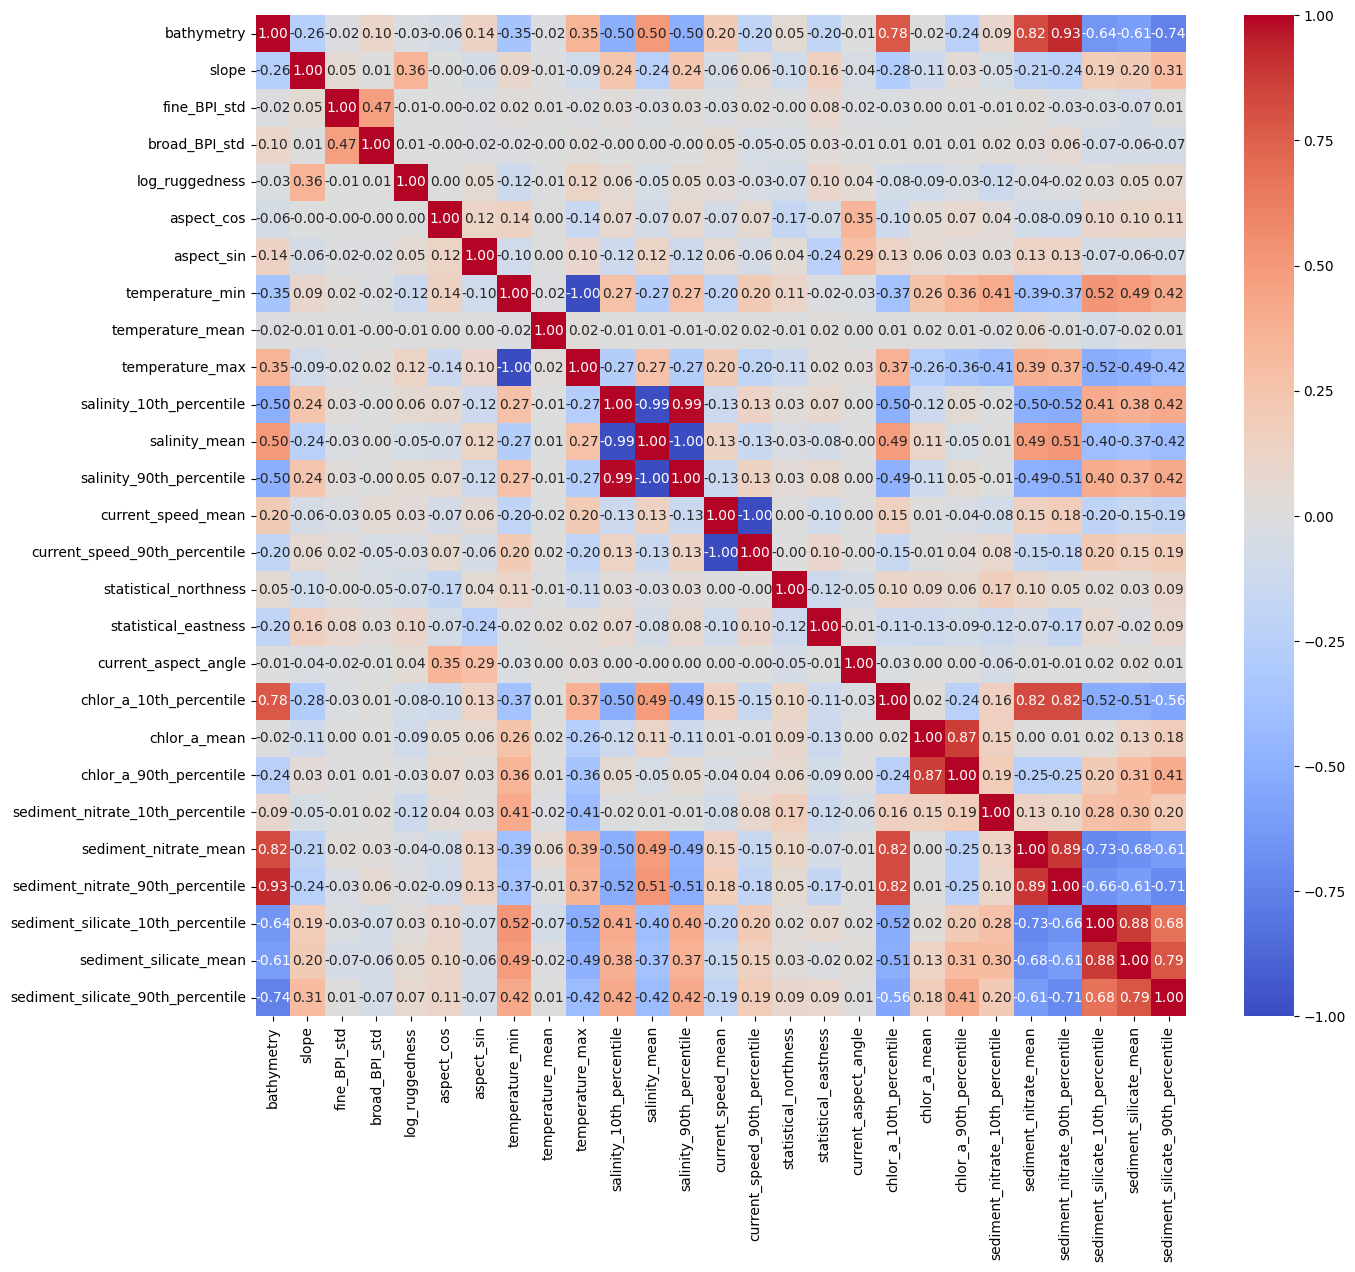

In [7]:
correlation_matrix_ordered = combined_df_no_xy.corr(method='spearman')
ordered_corr_final = correlation_matrix_ordered.loc[combined_df_no_xy.columns, combined_df_no_xy.columns]

plt.figure(figsize=(15, 13))
sns.heatmap(ordered_corr_final, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, annot_kws={'size': 10})
plt.savefig("correlation_matrix_ordered_pipeline6.png", dpi=300, bbox_inches='tight') 
plt.show()

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

In [8]:
#Make a correlation matrix using hierarchical clustering 
dissimilarity = 1 - abs(correlation_matrix_ordered)
Z = linkage(squareform(dissimilarity), 'complete')
threshold = 0.4
labels = fcluster(Z, threshold, criterion='distance')

labels_order = np.argsort(labels)
for idx, i in enumerate(combined_df_no_xy.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(combined_df_no_xy[i])
    else:
        df_to_append = pd.DataFrame(combined_df_no_xy[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

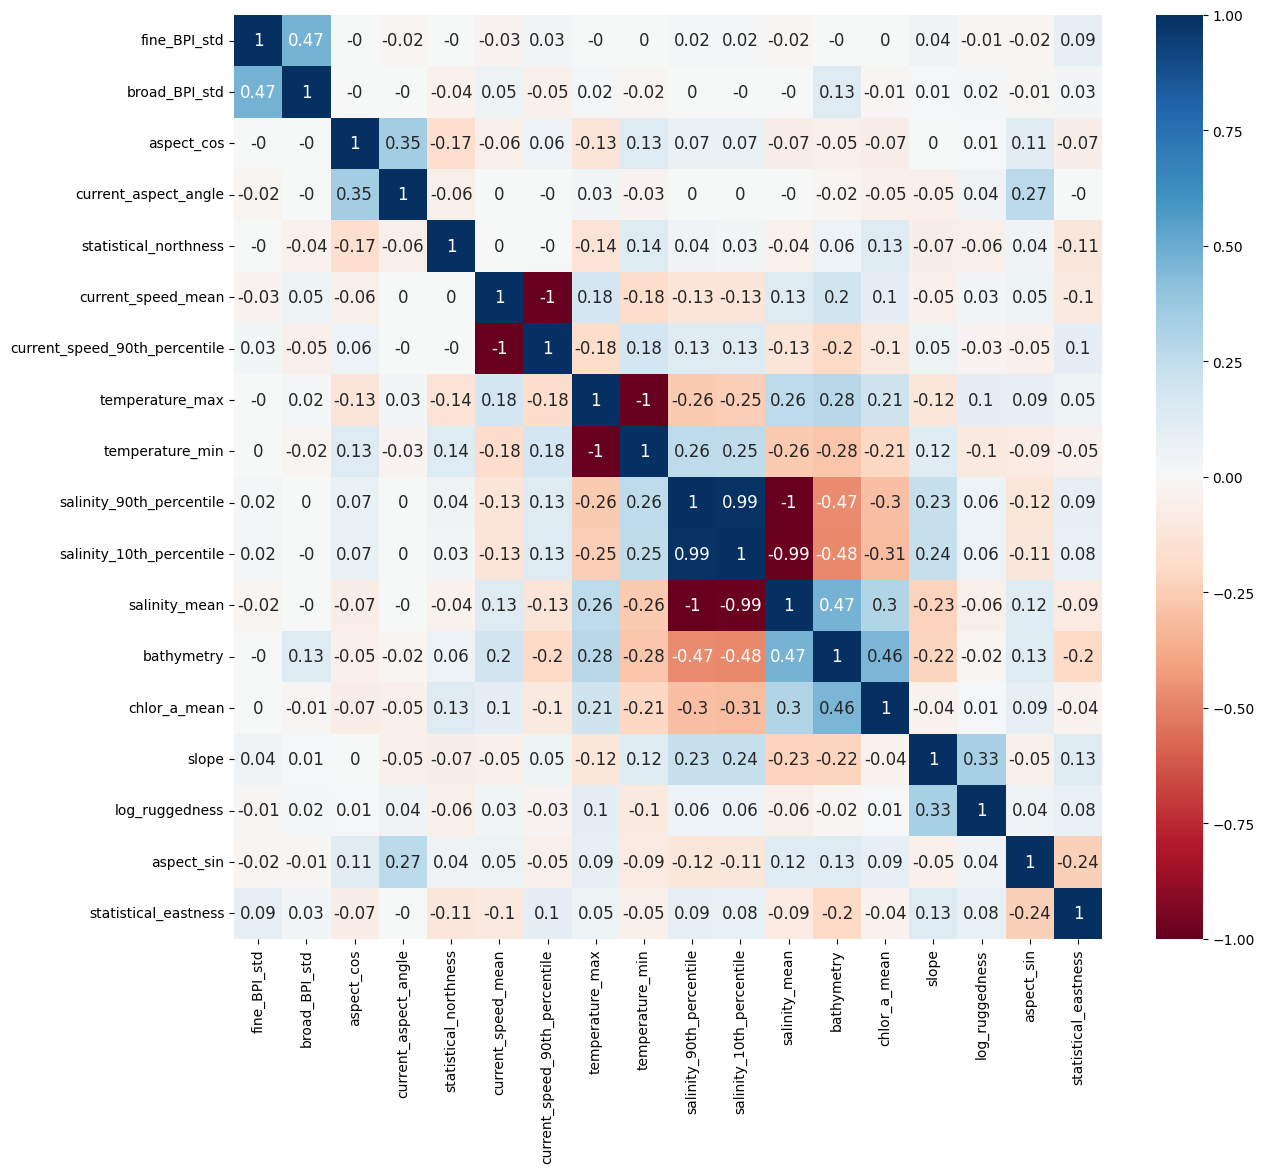

In [9]:
plt.figure(figsize=(14,12))
correlations = clustered.corr(method='spearman')
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 12}, vmin=-1, vmax=1);
plt.savefig("correlation_matrix_hierarchical_pipeline2.png", dpi=300, bbox_inches='tight') 
plt.show()

Make a df with additional label column: 1 for coral presence, 0 for no coral presence 

In [2]:
coral_filepath_emod = '/cluster/home/maikents/features_midnor_2019/coral_data/midnor_coral_data_emod_grid.parquet'
coral_data_emod = pd.read_parquet(coral_filepath_emod)

In [3]:
combined_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_6/total_df_nicer.parquet")

In [4]:
combined_df_copy = combined_df.copy()

In [5]:
combined_df_copy['labels'] = 0

available_indices = set(combined_df_copy.index)

for _, coral_point in coral_data_emod.iterrows():
    unassigned_df = combined_df_copy.loc[list(available_indices)]
    
    distances = np.sqrt(
        (unassigned_df['x'] - coral_point['x'])**2 +
        (unassigned_df['y'] - coral_point['y'])**2
    )
    
    if not distances.empty:
        closest_idx = distances.idxmin()
        combined_df_copy.at[closest_idx, 'labels'] = 1
        available_indices.remove(closest_idx)


In [6]:
num_labels_1 = combined_df_copy['labels'].sum()
print(f"Number of rows with label 1: {num_labels_1}")

Number of rows with label 1: 841


In [7]:
print(len(coral_data_emod['x']), len(coral_data_emod['y']))

841 841


In [8]:
combined_df_copy.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_6/total_df_with_nans_and_labels.parquet")

In [9]:
combined_df_no_nans = combined_df_copy.dropna()

In [10]:
combined_df_no_nans.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_6/total_df_no_nans_and_labels.parquet")

In [2]:
combined_df_no_nans = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/total_df_no_nans_and_labels.parquet")

In [6]:
combined_df_coral_location = combined_df_no_nans[combined_df_no_nans['labels'] == 1]


In [19]:
combined_df_no_xy_coral_locations = combined_df_coral_location.drop(columns=['x', 'y','labels'])

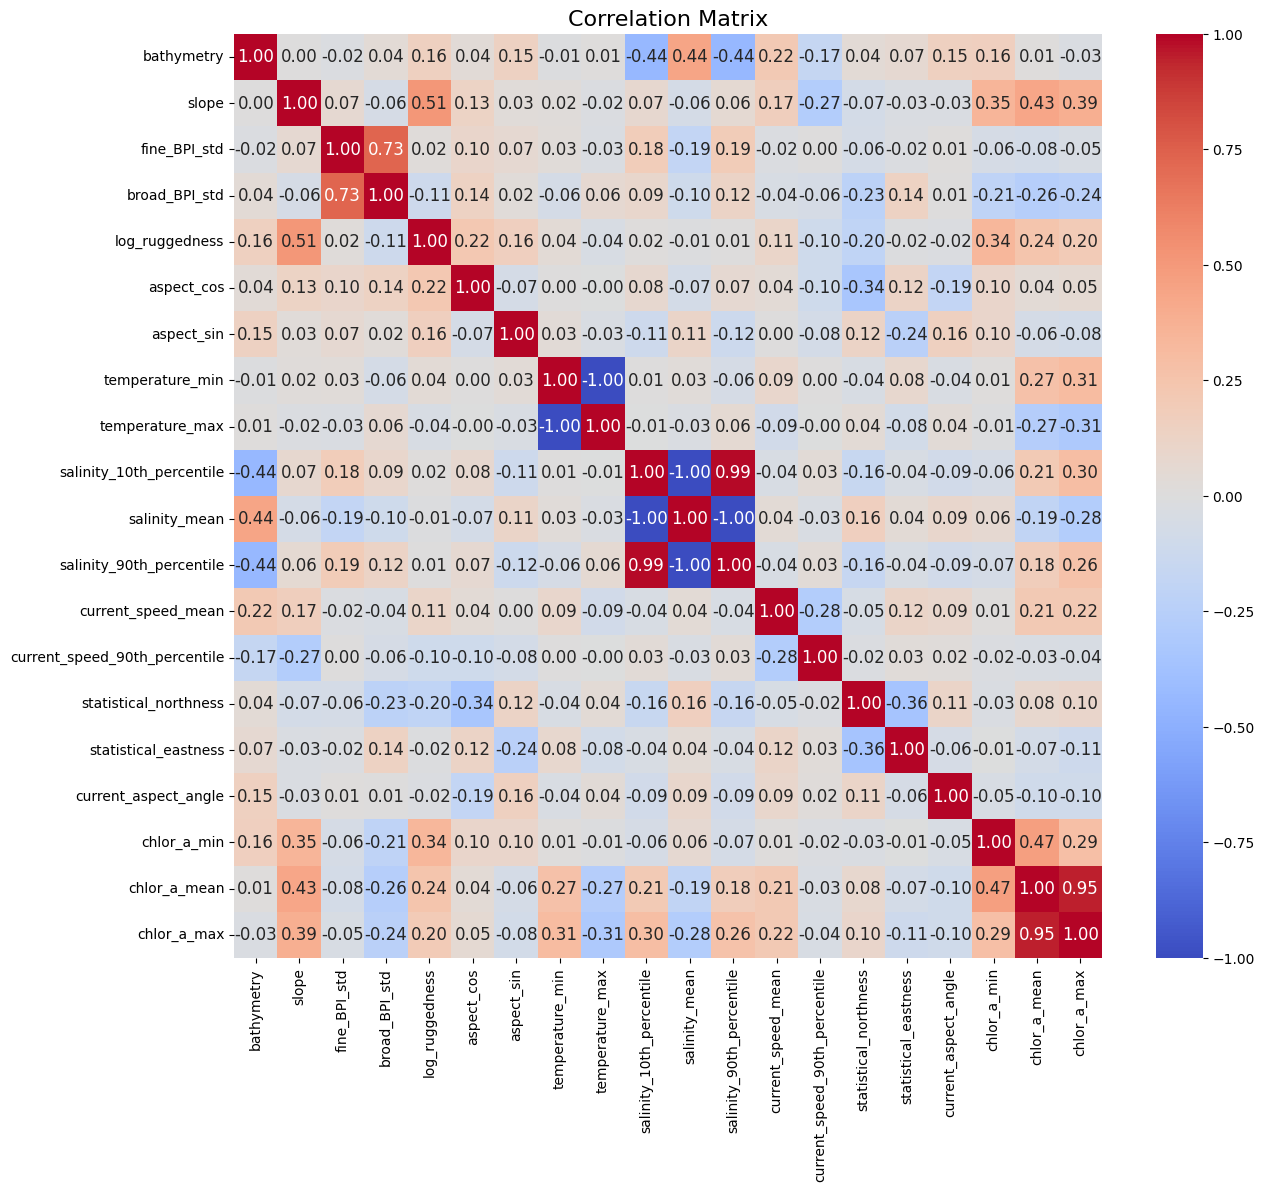

In [20]:
#Creating the correlation matrix

correlation_matrix = combined_df_no_xy_coral_locations.corr()
ordered_corr = correlation_matrix.loc[combined_df_no_xy_coral_locations.columns, combined_df_no_xy_coral_locations.columns]

plt.figure(figsize=(14, 12))  

sns.heatmap(ordered_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, annot_kws={'size': 12})

plt.title("Correlation Matrix", fontsize=16)
plt.savefig("correlation_matrix_coral_locations.png", dpi=300, bbox_inches='tight') 
plt.show()

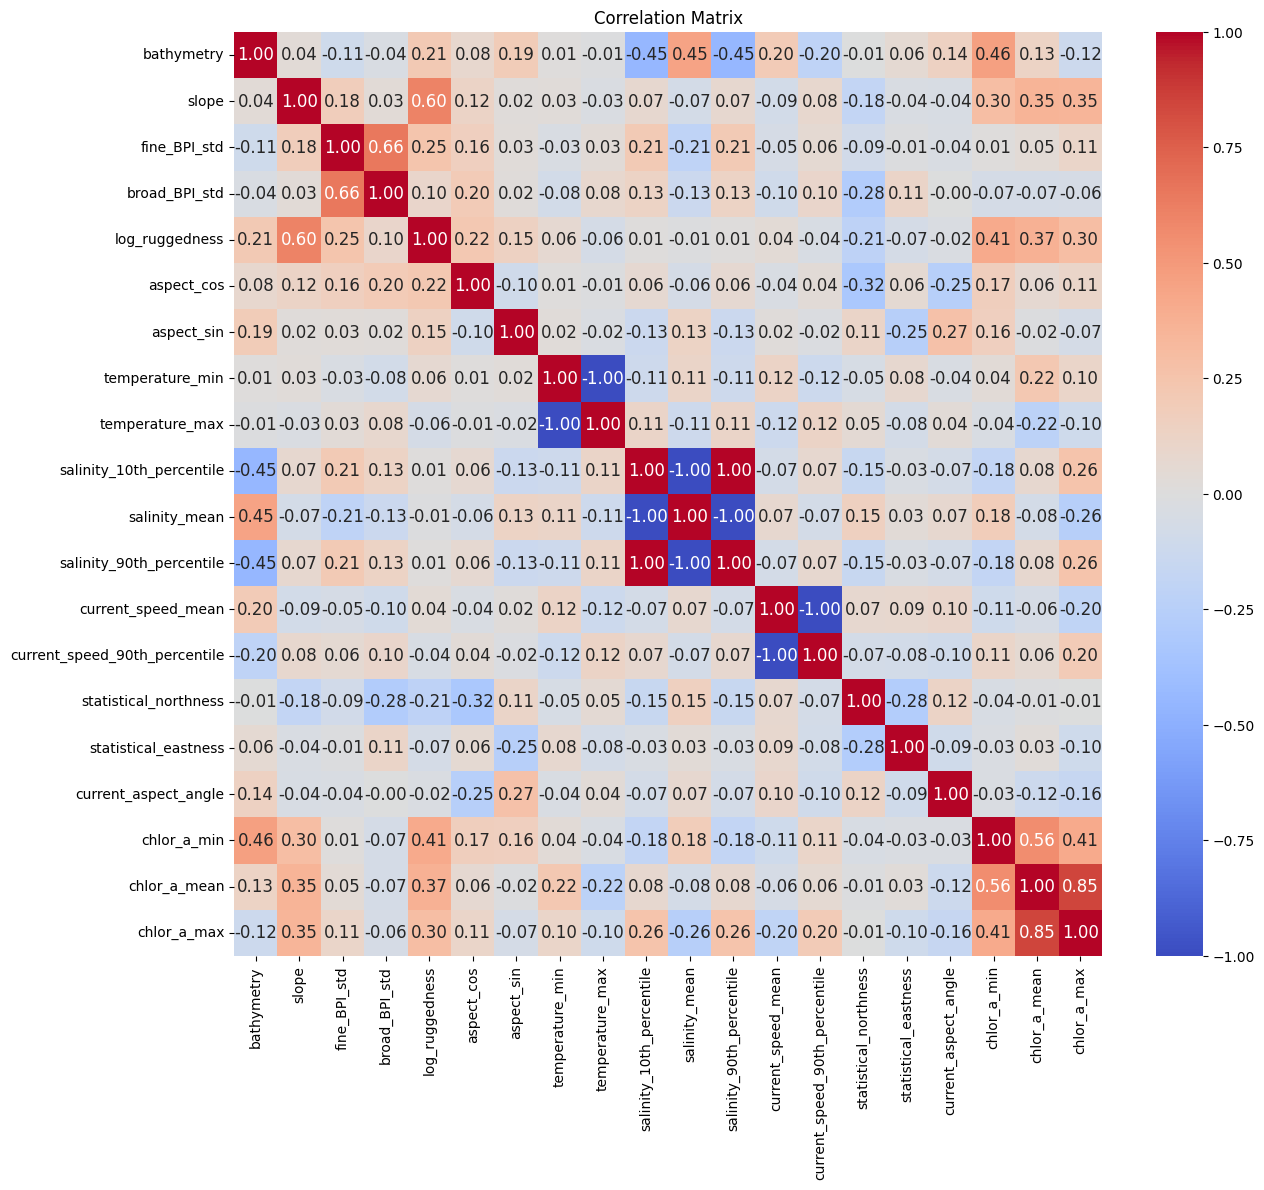

In [21]:
correlation_matrix_ordered = combined_df_no_xy_coral_locations.corr(method='spearman')
ordered_corr_final = correlation_matrix_ordered.loc[combined_df_no_xy_coral_locations.columns, combined_df_no_xy_coral_locations.columns]

plt.figure(figsize=(14, 12))
sns.heatmap(ordered_corr_final, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, annot_kws={'size': 12})
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix_ordered_coral_locations.png", dpi=300, bbox_inches='tight') 
plt.show()

In [22]:
#Make a correlation matrix using hierarchical clustering 
dissimilarity = 1 - abs(correlation_matrix_ordered)
Z = linkage(squareform(dissimilarity), 'complete')
threshold = 0.4
labels = fcluster(Z, threshold, criterion='distance')

labels_order = np.argsort(labels)
for idx, i in enumerate(combined_df_no_xy_coral_locations.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(combined_df_no_xy_coral_locations[i])
    else:
        df_to_append = pd.DataFrame(combined_df_no_xy_coral_locations[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

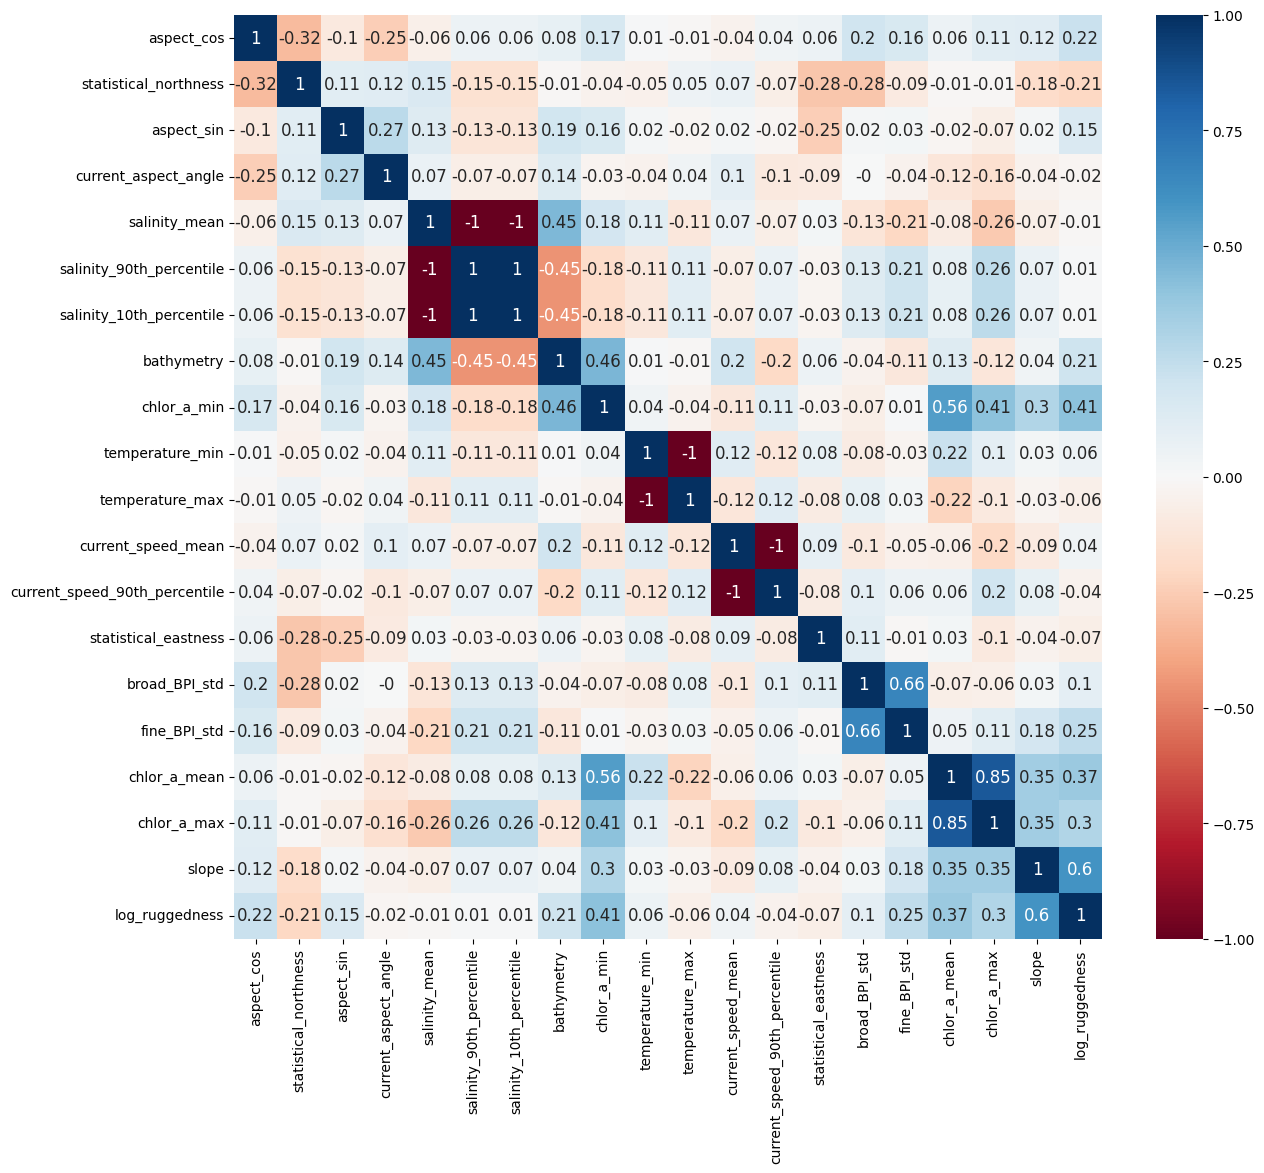

In [23]:
plt.figure(figsize=(14,12))
correlations = clustered.corr(method='spearman')
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 12}, vmin=-1, vmax=1);
plt.savefig("correlation_matrix_hierarchical_coral_locations.png", dpi=300, bbox_inches='tight') 
plt.show()